['57.7162290655613', '86.3966504399247', '70.9600194417041', '143.967990048071', '172.39406673207', '69.5273856076915', '60.9100272804197', '68.4075604763089', '6.07368650603257', '60.1962210570123', '188.046187292569', '60.9100272804197', '85.9681289787503', '65.8011598805356', '182.223448114319', '144.496751720691', '25.3526000302355', '182.025497223281', '33.6451850073236', '53.0735711172801', '29.9408823164541', '196.942651553525', '54.2318886654068', '58.2456802775208', '172.860451601445', '129.171830600113', '59.7028123315979', '60.6061272661735', '71.9658147306821', '73.99203279131', '75.1011895919468', '61.5606902786432', '72.845916281065', '72.0872528888395', '146.605921665035', '76.4898416893266', '77.3382380152201', '74.1313528441241', '74.110830899825', '193.420317362378', '159.476879773425', '178.800115000079', '75.0817318947752', '125.788378900605', '83.2627142263742', '134.195133728955', '83.6051250756301', '75.1818551934734', '75.0680919452207', '90.0975706901874', '177

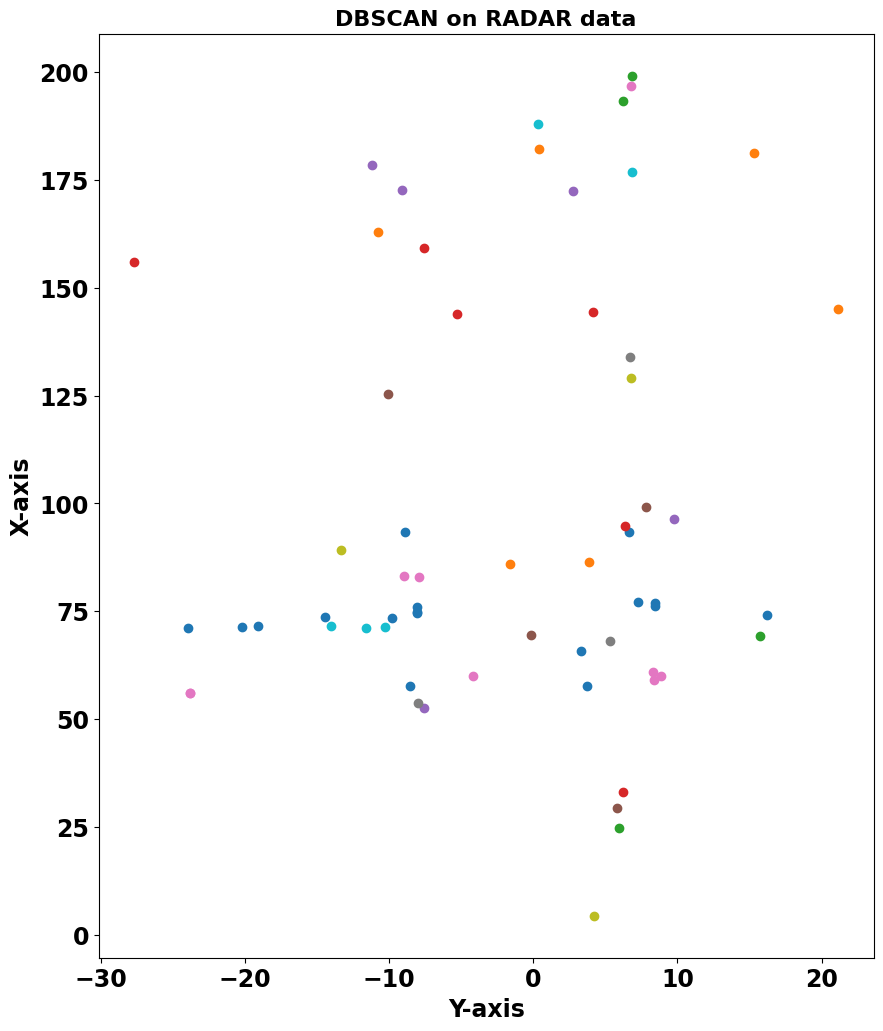

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Read the CSV file into a DataFrame, skipping the header row
df = pd.read_csv('/home/radar/Desktop/ayush/icra_possible_plots/13-12-30.474777_obj.csv', delimiter='\t', header=None)

# Extract RCS values from the 8th row and split by commas
rcs_data = df.iloc[3, 0].split(',')
print(rcs_data)
# Convert the split RCS values to floats
rcs_data = [float(value) for value in rcs_data]
print("ss",rcs_data)

# Perform DBSCAN clustering based on RCS values
dbscan = DBSCAN(eps=1, min_samples=3)  # You can adjust the parameters as needed
cluster_labels = dbscan.fit_predict([[r] for r in rcs_data])  # Convert RCS values to a list of lists

# Extract x and y data from the first and second rows and split by commas
x_data = df.iloc[0, 0].split(',')
y_data = df.iloc[1, 0].split(',')

# Convert the split values to floats
x_data = [float(value) for value in x_data]
y_data = [float(value) for value in y_data]

# Create a scatter plot with colors indicating the clusters from DBSCAN
fig = plt.figure(figsize=(10, 12))

# Create a scatter plot
ax = fig.add_subplot(111)

# Plot only the points that belong to a cluster (exclude noise points with label -1)
for label in set(cluster_labels):
    if label == -1:
        continue  # Skip noise points
    cluster_points_x = [x_data[i] for i in range(len(x_data)) if cluster_labels[i] == label]
    cluster_points_y = [y_data[i] for i in range(len(y_data)) if cluster_labels[i] == label]
    ax.scatter(cluster_points_y, cluster_points_x, label=f'Cluster {label}')

# Increase the font size for the x-axis and y-axis labels and tick labels
plt.xlabel('Y-axis', fontsize=17, fontweight="bold")
plt.ylabel('X-axis', fontsize=17, fontweight="bold")

# Increase the font size for x-axis and y-axis tick labels
plt.xticks(fontsize=17, fontweight="bold")
plt.yticks(fontsize=17, fontweight="bold")

# Add a title
plt.title('DBSCAN on RADAR data', fontsize=16, fontweight="bold")

# Print clusters
unique_labels = set(cluster_labels)
for label in unique_labels:
    if label == -1:
        print(f'Noise Points:')
    else:
        print(f'Cluster {label}:')
    cluster_points_x = [x_data[i] for i in range(len(x_data)) if cluster_labels[i] == label]
    cluster_points_y = [y_data[i] for i in range(len(y_data)) if cluster_labels[i] == label]
    for x, y in zip(cluster_points_x, cluster_points_y):
        print(f'({x}, {y})')

# Save the plot as an image (e.g., PNG)
# plt.savefig('icra_possible_plots/scene1_13-12-30.428601_RCS-big.png')

# Display the plot (optional)
plt.show()